In [256]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Installed version_information.py. To use it, type:
  %load_ext version_information
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
IPython 4.0.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
pandas 0.16.2
Mon Sep 14 18:28:41 2015 PDT

In [257]:
!pwd

/Users/berkeleyalmand/repos/ski_in_solitude


[autoreload of version_information failed: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named version_information
]


In [258]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import traffic data

In [259]:
df_traf = pd.DataFrame.from_csv('data/berthoud_skiers.csv')

In [260]:
df_traf.head()

,berthoud_toward_i70,berthoud_away_i70,day_of_week,skiers
FormattedDate,,,,
2014-10-31,1803,2822,4,0.971232
2014-11-01,1938,2686,5,1.169169
2014-11-02,2679,1379,6,1.314465
2014-11-03,1539,1290,0,1.061945
2014-11-04,1624,1529,1,1.013577


# Import weather data

In [261]:
df_met = pd.DataFrame.from_csv('data/all_weather_clean.csv')

In [262]:
df_met = df_met.resample(resamp_time)

In [263]:
df_met.head()

,Time,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,overcast,snowfall,high_temp_C,low_temp_C,max_windspeed,mean_windspeed,max_rh,mean_rh,mean_visibility
Date,,,,,,,,,,,,,,,,,,,
2014-11-01,1179.805556,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.847222,0.013889,0.138889,0.000000,0.00,5,-1,37,18.270270,96,88.430556,10.000000
2014-11-02,1211.217391,0.043478,0.014493,0.028986,0.072464,0.028986,0.000000,0.507246,0.086957,0.289855,0.115942,0.06,-1,-6,36,15.444444,96,86.623188,8.623188
2014-11-03,1243.306452,0.370968,0.048387,0.096774,0.080645,0.000000,0.032258,0.096774,0.096774,0.080645,0.725806,0.14,-6,-11,33,16.163265,92,85.919355,2.281250
2014-11-04,1179.819444,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.597222,0.000000,0.000000,0.291667,0.45,-5,-13,44,19.014286,96,83.986111,9.425000
2014-11-05,1179.875000,0.055556,0.000000,0.013889,0.055556,0.000000,0.000000,0.694444,0.041667,0.055556,0.208333,0.00,-1,-10,43,19.628571,92,84.708333,9.013889


In [264]:
resamp_time = '1440Min'
df_all = df_traf.join(df_met,how='outer')

In [265]:
df_all[:50]

,berthoud_toward_i70,berthoud_away_i70,day_of_week,skiers,Time,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,...,scattered_sky,overcast,snowfall,high_temp_C,low_temp_C,max_windspeed,mean_windspeed,max_rh,mean_rh,mean_visibility
2014-10-31,1803,2822,4,0.971232,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,1938,2686,5,1.169169,1179.805556,0.000000,0.000000,0.000000,0.000000,0.027778,...,0.138889,0.000000,0.00,5,-1,37,18.270270,96,88.430556,10.000000
2014-11-02,2679,1379,6,1.314465,1211.217391,0.043478,0.014493,0.028986,0.072464,0.028986,...,0.289855,0.115942,0.06,-1,-6,36,15.444444,96,86.623188,8.623188
2014-11-03,1539,1290,0,1.061945,1243.306452,0.370968,0.048387,0.096774,0.080645,0.000000,...,0.080645,0.725806,0.14,-6,-11,33,16.163265,92,85.919355,2.281250
2014-11-04,1624,1529,1,1.013577,1179.819444,0.000000,0.000000,0.000000,0.013889,0.000000,...,0.000000,0.291667,0.45,-5,-13,44,19.014286,96,83.986111,9.425000
2014-11-05,1672,1667,2,0.995124,1179.875000,0.055556,0.000000,0.013889,0.055556,0.000000,...,0.055556,0.208333,0.00,-1,-10,43,19.628571,92,84.708333,9.013889
2014-11-06,1755,1947,3,0.994153,1179.861111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,2,-5,36,21.652174,92,86.527778,10.000000
2014-11-07,1961,3373,4,1.031448,1163.676056,0.000000,0.000000,0.028169,0.014085,0.000000,...,0.323944,0.014085,0.00,0,-6,56,38.666667,96,86.901408,9.785211
2014-11-08,2323,2616,5,1.305724,1161.771429,0.228571,0.000000,0.000000,0.085714,0.000000,...,0.042857,0.285714,0.00,1,-8,49,27.276923,96,86.814286,6.975000
2014-11-09,3568,1568,6,1.362638,1179.875000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,2,-3,55,38.014085,92,86.750000,10.000000


In [266]:
df_all.drop(['berthoud_toward_i70', 'berthoud_away_i70', 'Time'], axis=1, inplace=True)

### Create a weekend column

In [267]:
df_all['is_weekend'] = df_all.day_of_week.map(lambda day: 1 if day == 5 or day == 6 else 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128d70e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a2263d0>]], dtype=object)

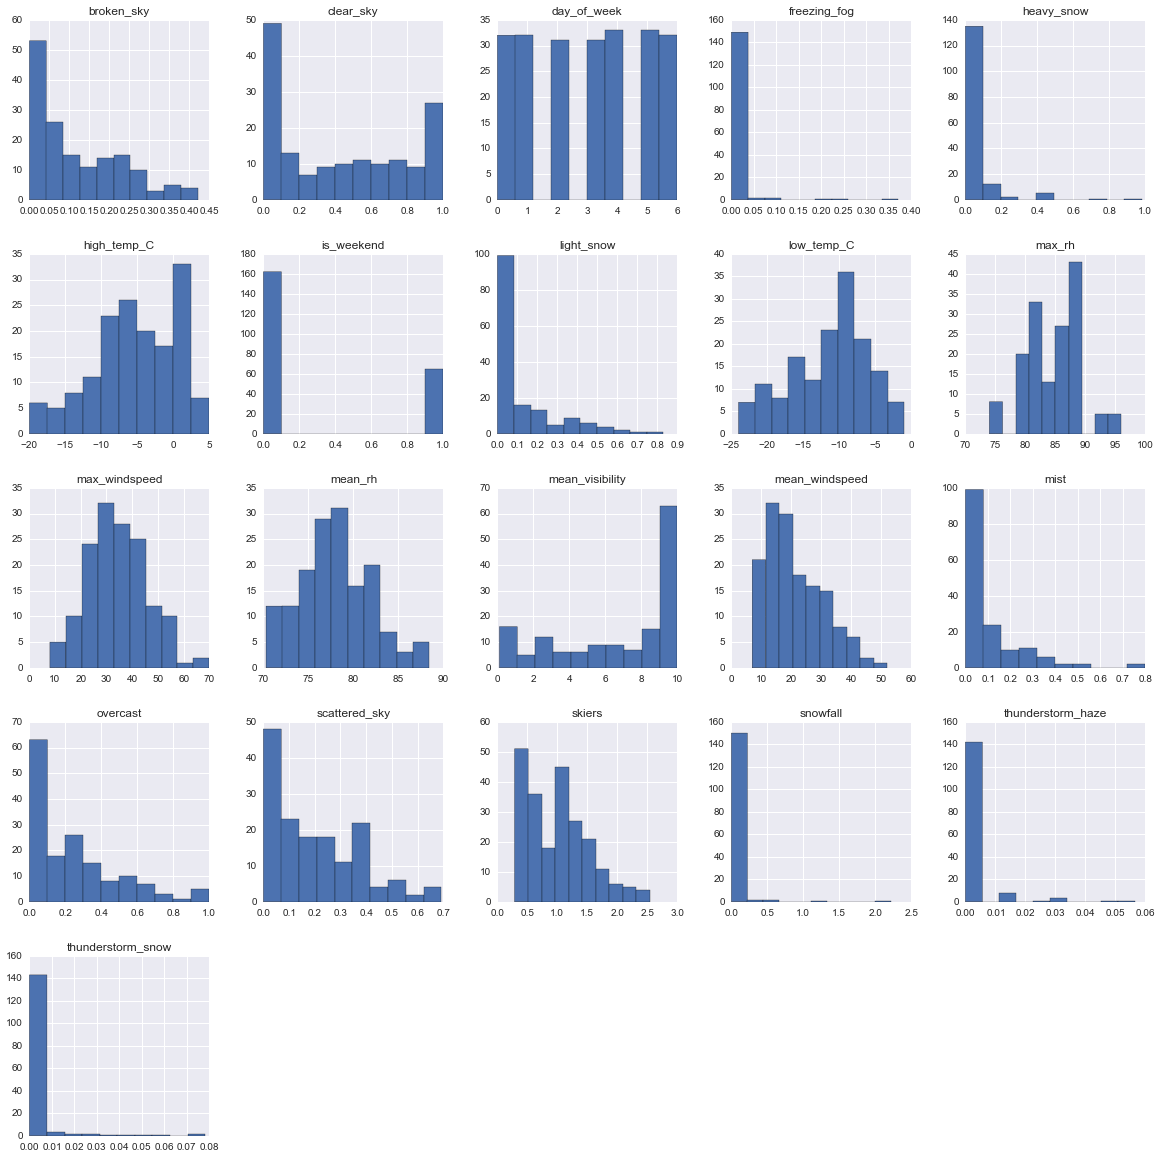

In [268]:
df_all.hist(figsize=(20,20))

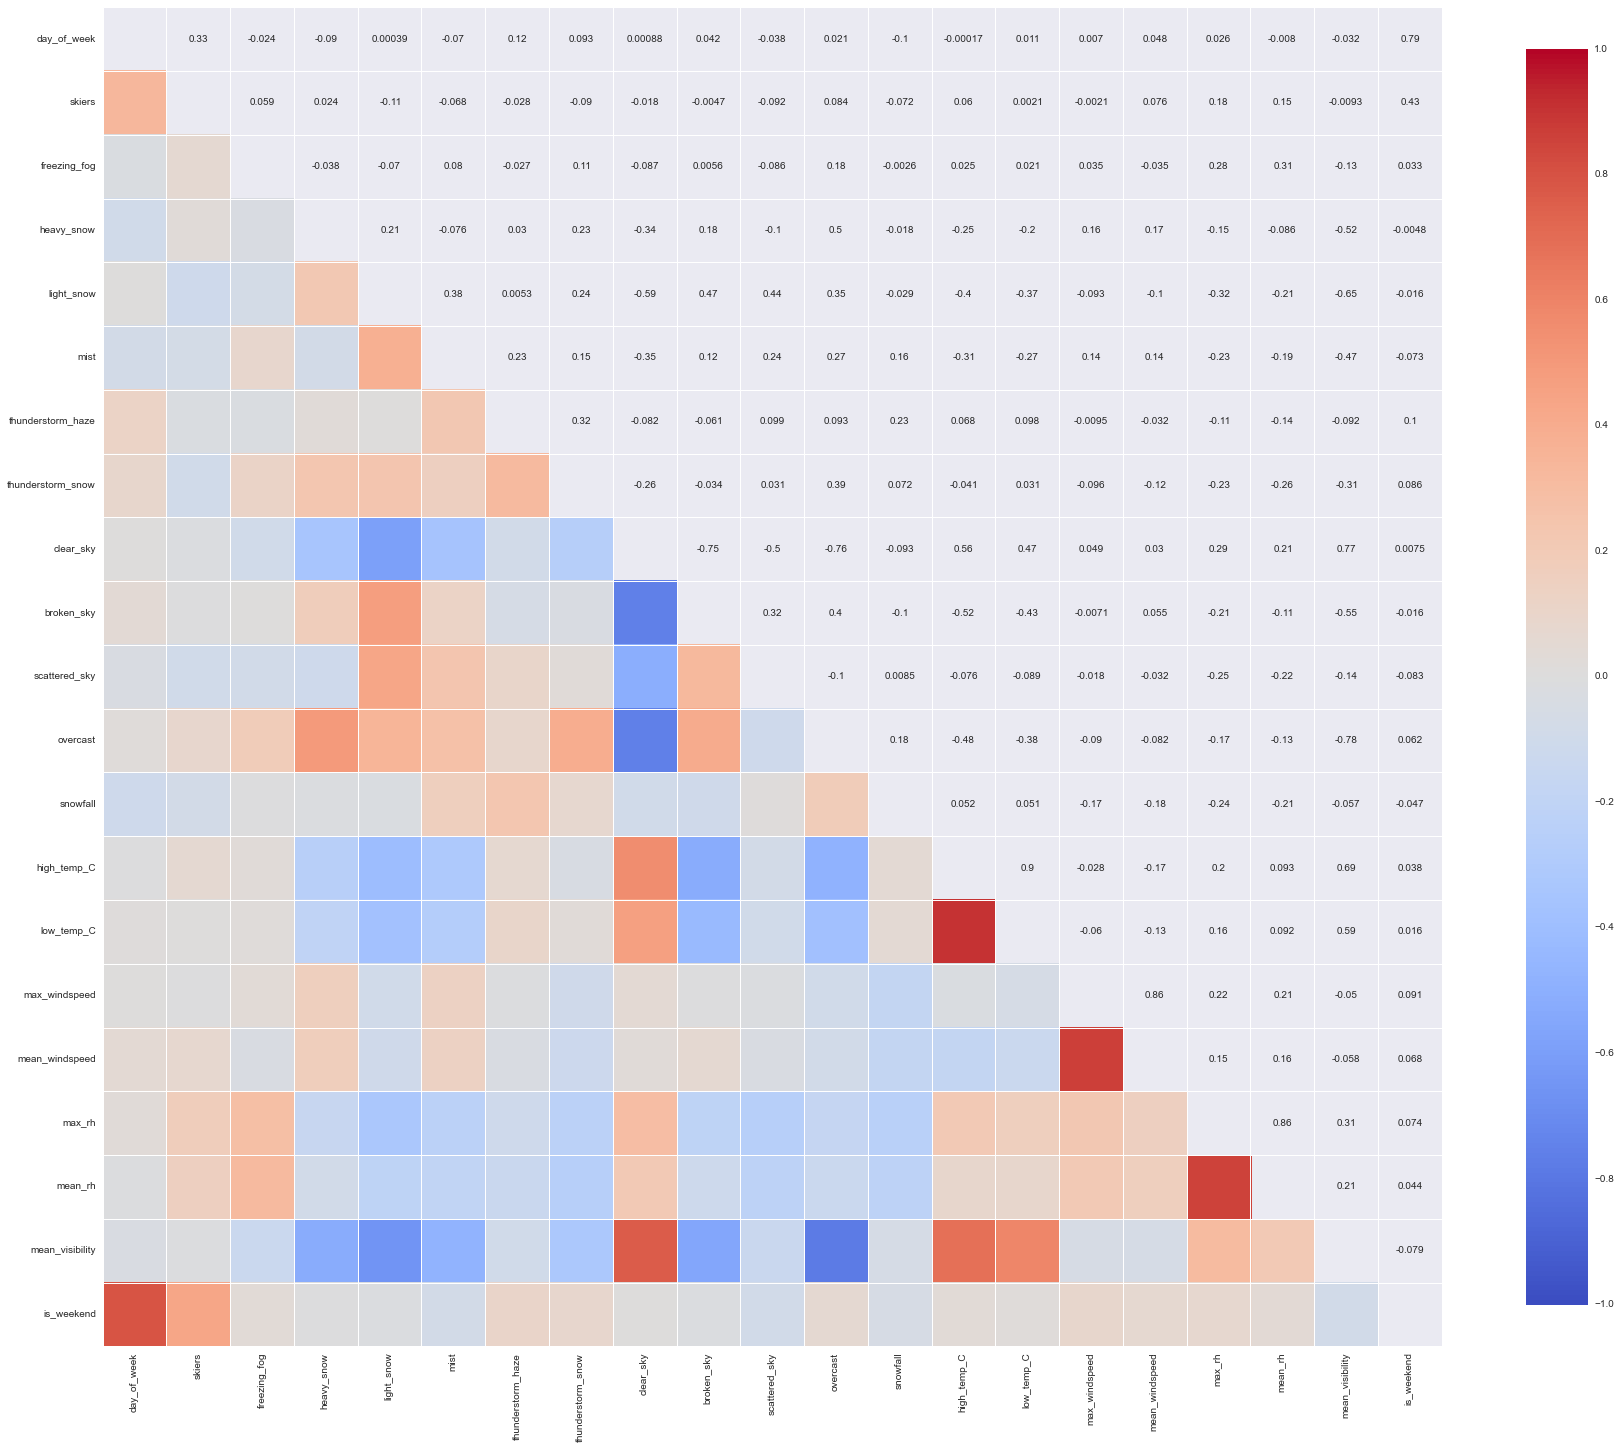

In [269]:
f, ax = plt.subplots(figsize=(30, 30))
sns.corrplot(df_all, annot=True, sig_stars=False,
             diag_names=False, ax=ax)

In [270]:
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()
holiday_list = calendar.holidays(datetime.datetime(2014, 11, 1), datetime.datetime(2015, 5, 1))

In [271]:
holidays = []
for holiday in holiday_list:
    holidays.append(holiday)

In [272]:
vet_day = holidays[0]
thanksgiv = holidays[1]
xmas = holidays[2]
new_years = holidays[3]
mlk_day = holidays[4]
pres_day = holidays[5]

In [431]:
vet_day

Timestamp('2014-11-11 00:00:00')

In [436]:
datetime.datetime(2014,3,8,0,0,0).date()

datetime.date(2014, 3, 8)

In [468]:
def make_spring_break_col(df, holiday, hol_name):
    #3/8-3/30 is spring break
    is_holiday = []
    for idx, row in df.iterrows():
        if idx.date() >= datetime.datetime(2015,3,8,0,0,0).date() and idx.date() <= datetime.datetime(2015,3,30,0,0,0).date():
            is_holiday.append(1)
        else:
            is_holiday.append(0)
    df['spring_break'] = is_holiday
    return df

In [488]:
df_all = make_spring_break_col(df_all, holiday, 'hol_name')

In [489]:
def make_spring_trailing_weeks(df, holiday, hol_name):
    #3/8-3/30 is spring break
    is_holiday = []
    for idx, row in df.iterrows():
        if idx.date() >= datetime.datetime(2015,3,1,0,0,0).date() and idx.date() <= datetime.datetime(2015,3,1,0,0,0).date():
            is_holiday.append(1)
        elif idx.date() >= datetime.datetime(2015,3,31,0,0,0).date() and idx.date() <= datetime.datetime(2015,4,5,0,0,0).date():
            is_holiday.append(1)
        else:
            is_holiday.append(0)
    df['spring_break_ends'] = is_holiday
    return df

In [491]:
df_all = make_spring_trailing_weeks(df_all, holiday, 'hol_name')

In [492]:
def make_holiday_column(df, holiday, hol_name):
    is_holiday = []
    for idx, row in df.iterrows():
        diff = abs(idx.date() - holiday.date()).days
        if diff > 7:
            is_holiday.append(0)
        elif diff == 0:
            is_holiday.append(7)
        else:
            is_holiday.append(7-diff)
    df[hol_name] = is_holiday
    return df

In [493]:
df_all = make_holiday_column(df_all, vet_day, 'vet_day')
df_all = make_holiday_column(df_all, thanksgiv, 'thanksgiv')
df_all = make_holiday_column(df_all, xmas, 'xmas')
df_all = make_holiday_column(df_all, new_years, 'new_years')
df_all = make_holiday_column(df_all, mlk_day, 'mlk_day')
df_all = make_holiday_column(df_all, pres_day, 'pres_day')

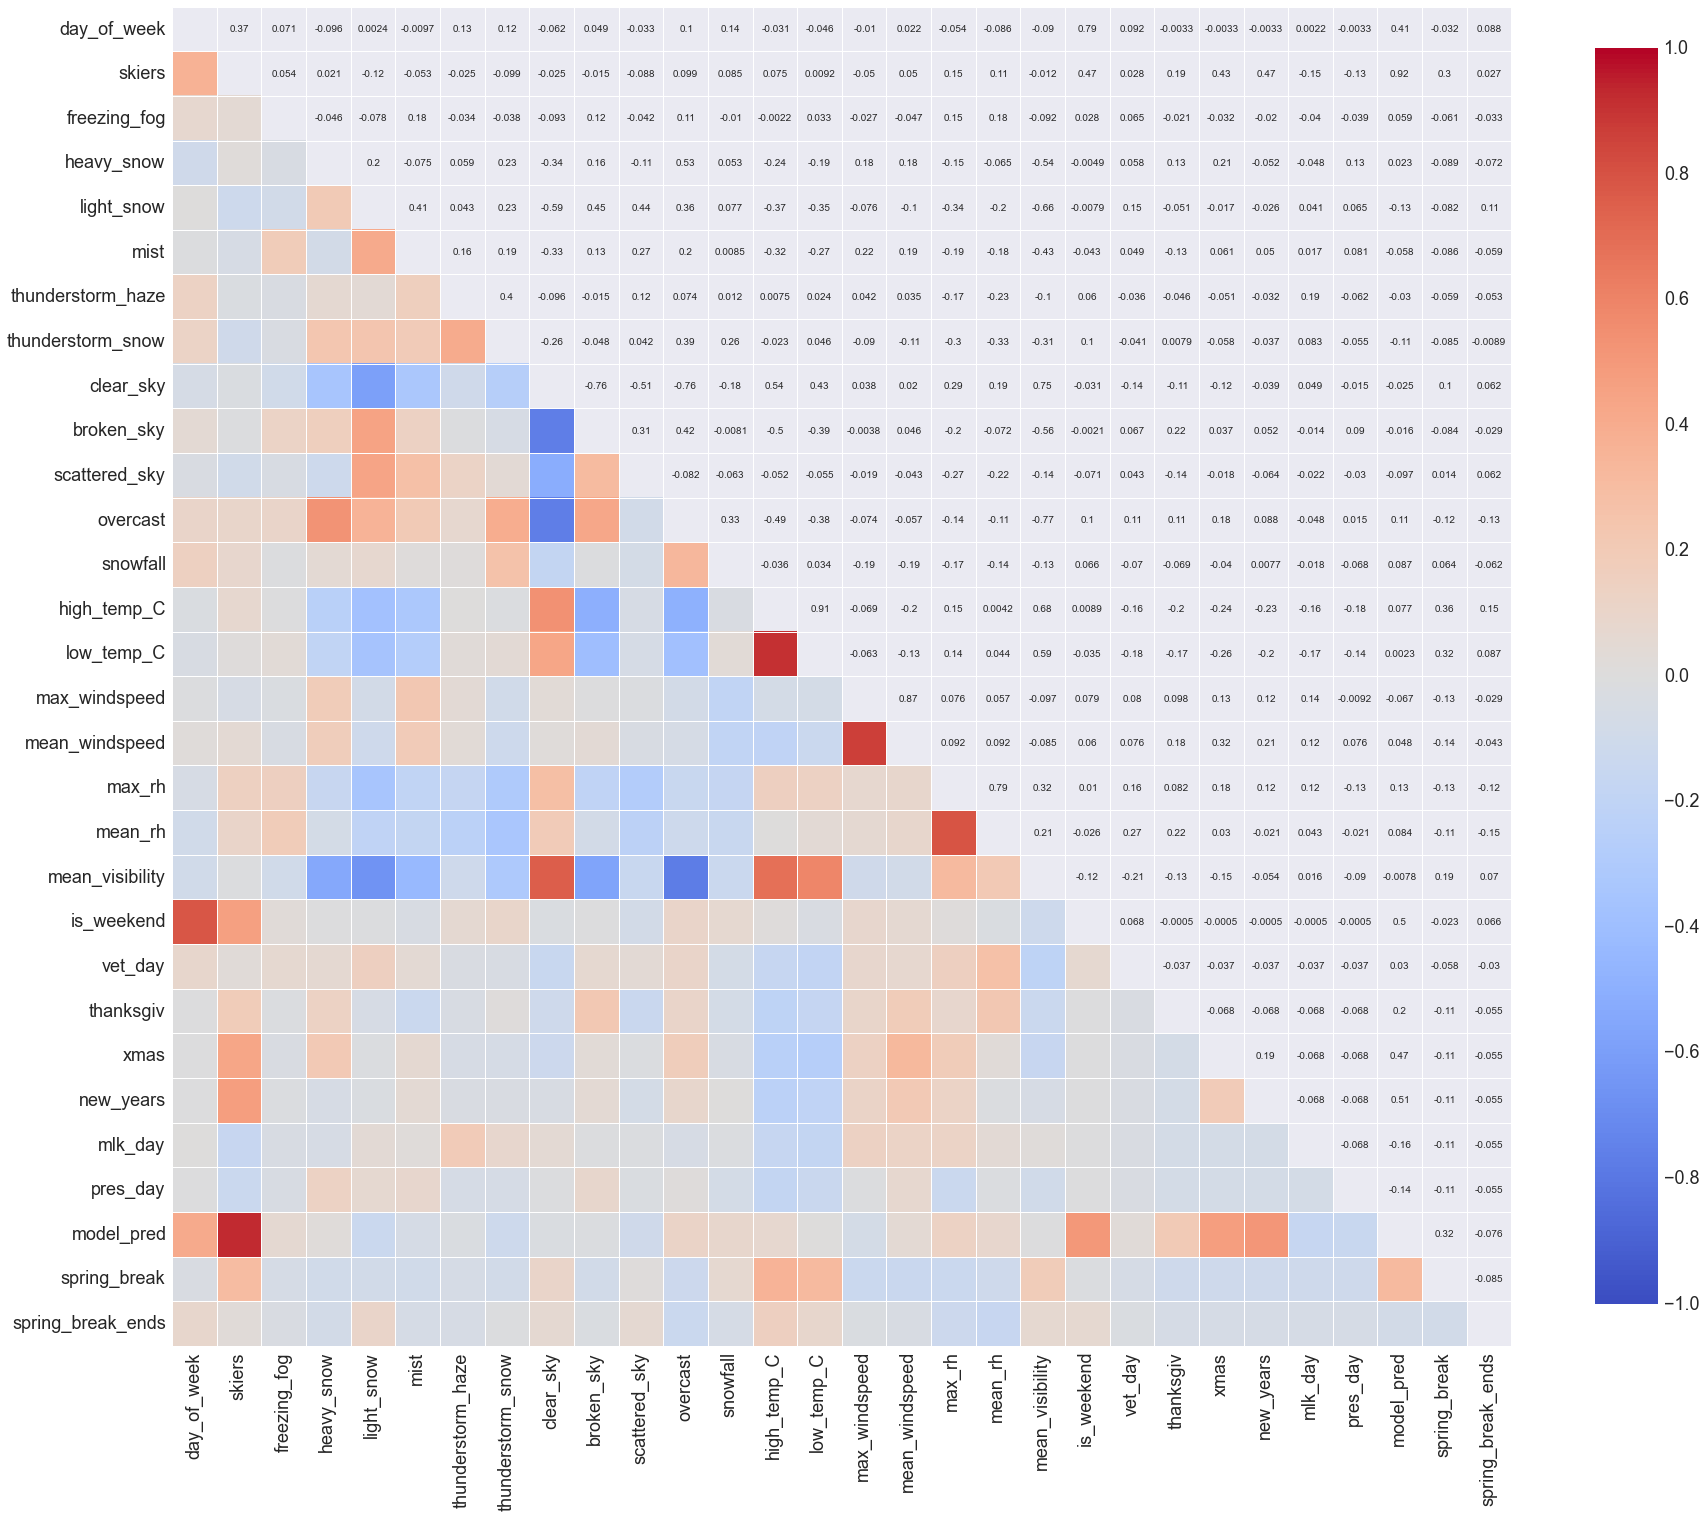

In [494]:
f, ax = plt.subplots(figsize=(30, 30))
sns.corrplot(df_all, annot=True, sig_stars=False,
             diag_names=False, ax=ax)

In [495]:
df_all = df_all.ix[datetime.datetime(2014, 11, 14):datetime.datetime(2015, 4, 26)]

In [496]:
lr = linear_model.LinearRegression()

In [497]:
columns = list(df_all.columns.values)
columns.remove('skiers')

In [498]:
X_nan = df_all[columns].values
y_nan = df_all.skiers.values

In [499]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
y = imp.fit_transform(y_nan)
X = imp.fit_transform(X_nan)

In [500]:
y = y.T

In [501]:
mdl = lr.fit(X, y) 

In [502]:
mdl.coef_

array([[ -4.98997798e-03,  -6.75055516e-02,  -6.61229567e-03,
         -1.19247701e-01,   5.06493979e-02,   2.54786636e-01,
         -3.86703944e-01,   6.52004222e-02,   4.19126223e-02,
          7.55744846e-02,   9.31793455e-02,   4.32664530e-02,
         -4.85411257e-03,   3.23659653e-03,   1.05308689e-04,
         -5.77332845e-04,  -1.00774410e-03,   9.07343439e-04,
         -1.72062995e-03,   1.64639553e-02,   1.28898008e-02,
          3.99147959e-03,   4.63281645e-03,   4.00846509e-03,
          4.78992725e-03,   2.48867098e-03,   9.79417446e-01,
          4.39019568e-02,   3.02459270e-01]])

In [503]:
pred = mdl.predict(X)
df_all['model_pred'] = pred

In [504]:
ref_column = 'skiers'

In [505]:
def fitted_vs_ref_plot(df, ref_column):
    plt.figure(facecolor='w', figsize = (8,8))
    a, b, axes, label_size = plot_params()
    plt.plot(df[ref_column], df.model_pred, linestyle = '', marker = '.', alpha = 0.3)
    plt.xlabel('Skier Visits', size = label_size)
    plt.ylabel('Predicted Skier Visits', size = label_size)
    plt.plot([0, df.model_pred.max()], [0,df.model_pred.max()])
    #axes.set_ylim([-20,100])

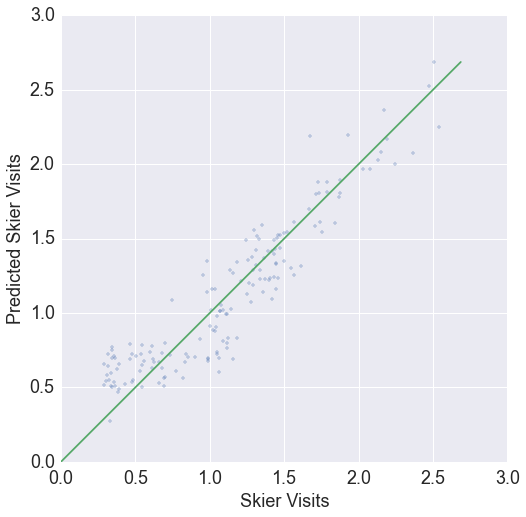

In [506]:
fitted_vs_ref_plot(df_all, ref_column)

In [507]:
def plot_fitted_and_ref_vs_time(df, ref_column):
    plt.figure(facecolor='w', figsize = (15,10))
    a, b, axes, label_size = plot_params()
    df[ref_column].plot(marker = '.',linestyle = '-', label = 'Reference Data')
    df.model_pred.plot(marker = '.',linestyle = '-', label = 'Predicted Data')
    axes.set_ylim([0,3])
    plt.legend(fontsize = label_size)
    plt.ylabel('Ozone Concentration (ppb)', size = label_size)
    plt.xlabel('Date', size = label_size)

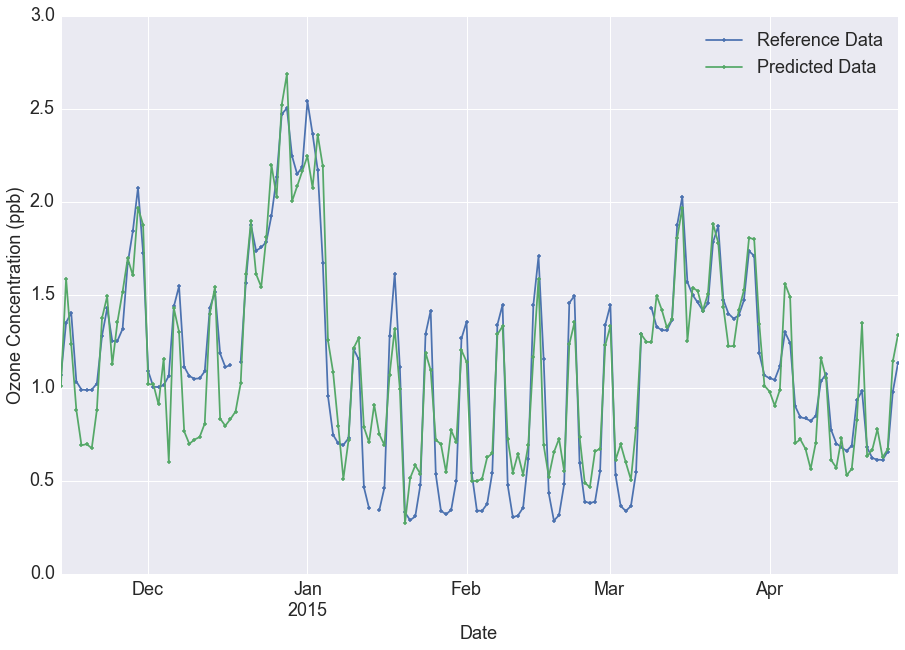

In [508]:
plot_fitted_and_ref_vs_time(df_all, ref_column)